<a href="https://colab.research.google.com/github/rtiwari6-stats/fraud-classifier/blob/main/Online_Payments_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#data exploration for fraud detection

#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("drive/MyDrive/fraud-full.csv")

data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [37]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00"
mean,243.40,"179,861.90","833,883.10","855,113.67","1,100,701.67","1,224,996.40",0.00,0.00
std,142.33,"603,858.23","2,888,242.67","2,924,048.50","3,399,180.11","3,674,128.94",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,389.57",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,871.94","14,208.00",0.00,"132,705.66","214,661.44",0.00,0.00
75%,335.00,"208,721.48","107,315.18","144,258.41","943,036.71","1,111,909.25",0.00,0.00
max,743.00,"92,445,516.64","59,585,040.37","49,585,040.37","356,015,889.35","356,179,278.92",1.00,1.00


In [38]:

data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

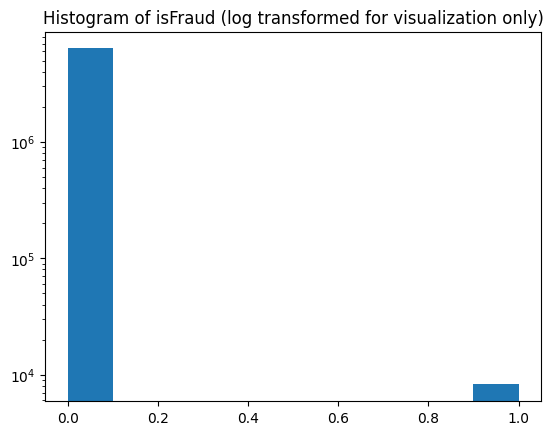

In [39]:
plt.yscale('log')
plt.hist(data["isFraud"])
plt.title("Histogram of isFraud (log transformed for visualization only)")
plt.show()

In [40]:
data['isFraud'].value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

In [41]:
data.drop(['isFlaggedFraud'], axis=1, inplace=True)
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0


In [42]:
# we have an unbalanced dataset so we use stratified sampling to ensure same distribution of
# fradulent transactions in training and test
# train-test split is 0.7:0.3

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
data=data.dropna()
for train_index, test_index in split.split(data, data["isFraud"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

X = strat_train_set.drop("isFraud", axis=1)
y = strat_train_set["isFraud"].copy()

X_test = strat_test_set.drop("isFraud", axis=1)
y_test = strat_test_set["isFraud"].copy()

# from sklearn.model_selection import train_test_split

# # Select the first 10 columns of our DataFrame that we will use as the predictors in our models
# x = data.iloc[:,:9]

# # Select the response column
# y = data.isFraud

# # Split these data into training and testing datasets
# X, X_test, y, y_test = train_test_split(x,y, random_state=123)



In [43]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
4310249,308,CASH_IN,"260,485.23",C386091144,"32,371.00","292,856.23",C268784004,"4,633,560.35","4,373,075.12"
318938,16,TRANSFER,"1,387,060.19",C977405179,"432,673.78",0.00,C1032483118,0.00,"1,033,440.62"
3375139,254,TRANSFER,"1,140,661.98",C1091684896,"59,947.00",0.00,C1969901822,"15,000.85","1,155,662.83"
5492781,380,CASH_IN,"169,390.39",C300199504,"80,047.10","249,437.49",C591887141,"1,467,039.66","1,297,649.27"
807263,40,CASH_IN,"4,867.26",C905217988,"5,989,226.14","5,994,093.40",C926869366,"1,609,385.28","1,604,518.02"


In [44]:
y.head()

4310249    0
318938     0
3375139    0
5492781    0
807263     0
Name: isFraud, dtype: int64

In [45]:
X.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

In [46]:
X['type'].value_counts()

CASH_OUT    1565926
PAYMENT     1506155
CASH_IN      979750
TRANSFER     373044
DEBIT         28959
Name: type, dtype: int64

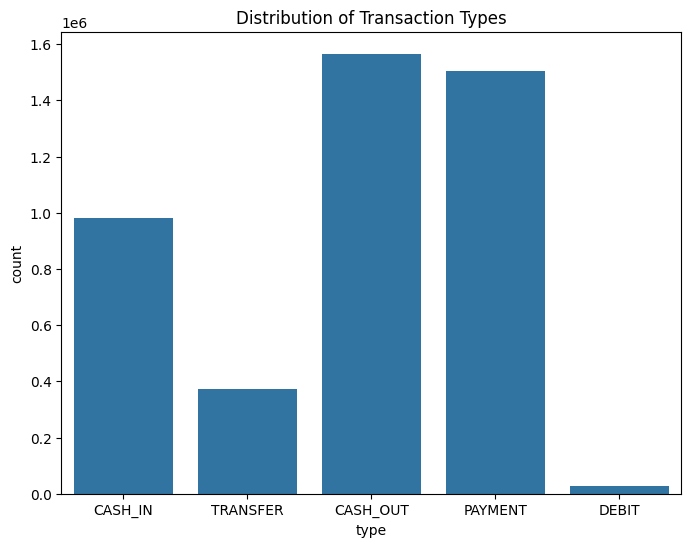

In [47]:
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.countplot(x='type', data=X)
plt.title('Distribution of Transaction Types')
plt.show()

In [48]:
print(data[['type','isFraud']].value_counts())


type      isFraud
CASH_OUT  0          2233384
PAYMENT   0          2151495
CASH_IN   0          1399284
TRANSFER  0           528812
DEBIT     0            41432
CASH_OUT  1             4116
TRANSFER  1             4097
dtype: int64


type
CASH_OUT    2882
TRANSFER    2867
dtype: int64


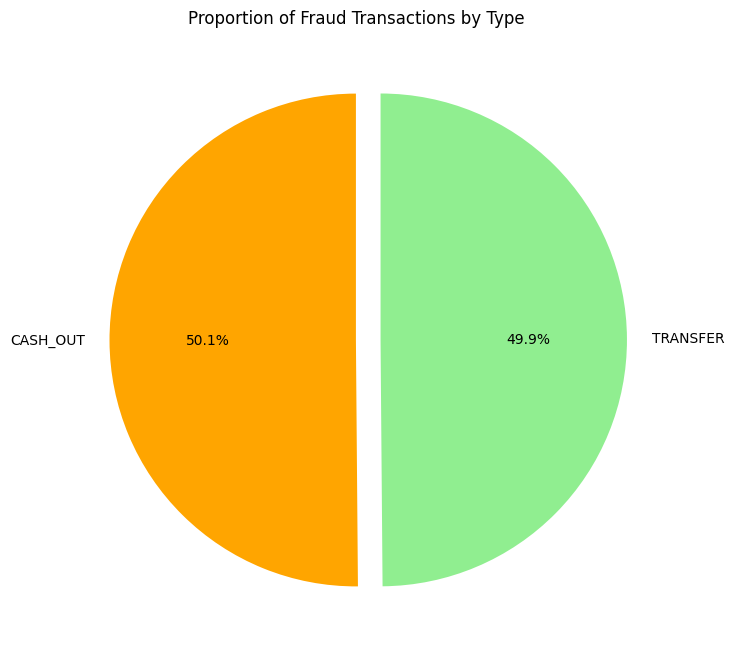

In [49]:
fraud_transactions = X[y == 1]
fraud_counts_by_type = fraud_transactions.groupby('type').size()
print(fraud_counts_by_type)

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_by_type, labels=fraud_counts_by_type.index, autopct='%1.1f%%', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Proportion of Fraud Transactions by Type')
plt.show()

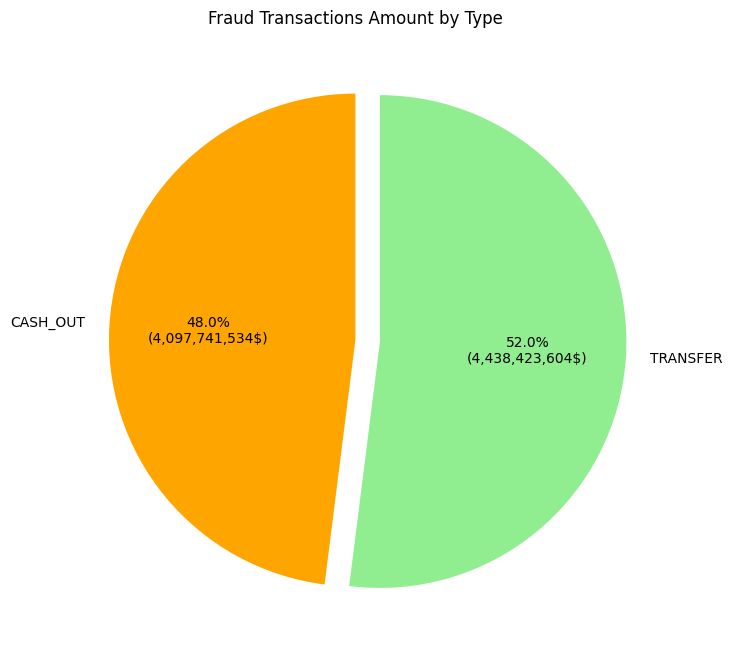

In [50]:
fraud_amounts_by_type = X[y == 1].groupby("type")["amount"].sum()
plt.figure(figsize=(8, 8))
plt.pie(fraud_amounts_by_type, labels=fraud_amounts_by_type.index,
        autopct=lambda p: f'{p:.1f}%\n({p * sum(fraud_amounts_by_type) / 100:,.0f}$)', startangle=90,
        colors=['orange', 'lightgreen'], explode=(0, 0.1))
plt.title('Fraud Transactions Amount by Type')
plt.show()

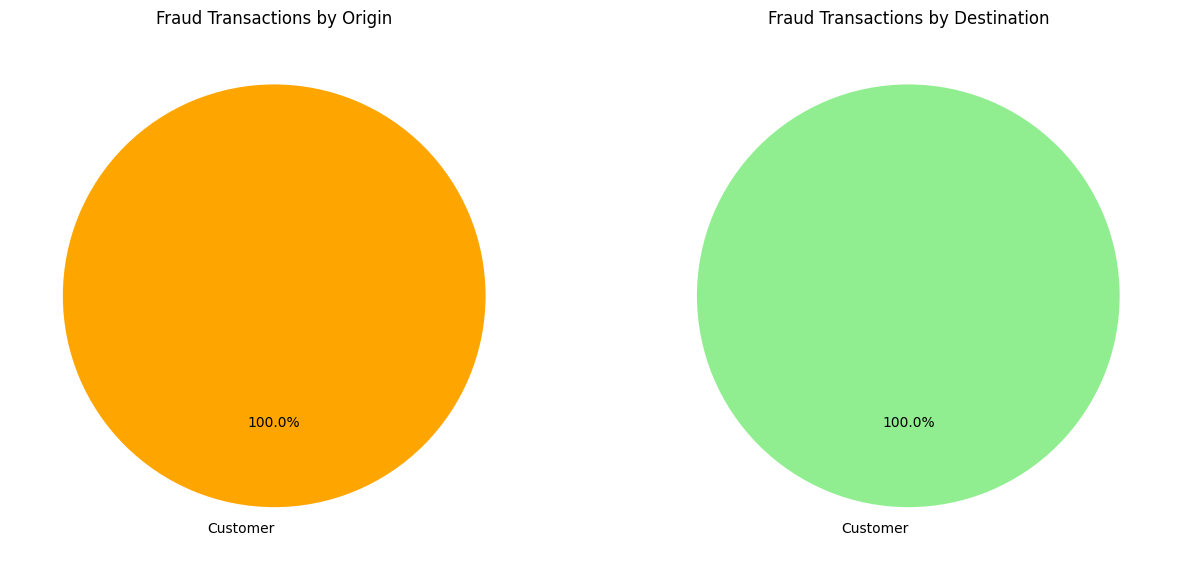

In [51]:
fraud_transactions = X[y == 1].copy()
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrig'].str[0]
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest'].str[0]
fraud_transactions['nameOrg_first_letter'] = fraud_transactions['nameOrg_first_letter'].replace('C', 'Customer')
fraud_transactions['nameDest_first_letter'] = fraud_transactions['nameDest_first_letter'].replace('C', 'Customer')
fraud_by_name_orig_first_letter = fraud_transactions.groupby('nameOrg_first_letter').size()
fraud_by_name_dest_first_letter = fraud_transactions.groupby('nameDest_first_letter').size()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(fraud_by_name_orig_first_letter, labels=fraud_by_name_orig_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['orange'])
axes[0].set_title('Fraud Transactions by Origin')

axes[1].pie(fraud_by_name_dest_first_letter, labels=fraud_by_name_dest_first_letter.index,
            autopct='%1.1f%%', startangle=90, colors=['lightgreen'])
axes[1].set_title('Fraud Transactions by Destination')

plt.show()

In [52]:
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Statistics about amounts for non-fraud transactions:\n",
      pd.DataFrame.describe(X[y == 0].amount), "\n")
print("Statistics about amounts for fraud transactions:\n",
      pd.DataFrame.describe(X[y == 1].amount), "\n")

Statistics about amounts for non-fraud transactions:
 count    4,448,085.00
mean       178,253.23
std        594,238.83
min              0.01
25%         13,367.20
50%         74,639.92
75%        208,291.17
max     92,445,516.64
Name: amount, dtype: float64 

Statistics about amounts for fraud transactions:
 count        5,749.00
mean     1,484,808.69
std      2,409,643.17
min              0.00
25%        127,447.68
50%        452,261.67
75%      1,555,182.41
max     10,000,000.00
Name: amount, dtype: float64 



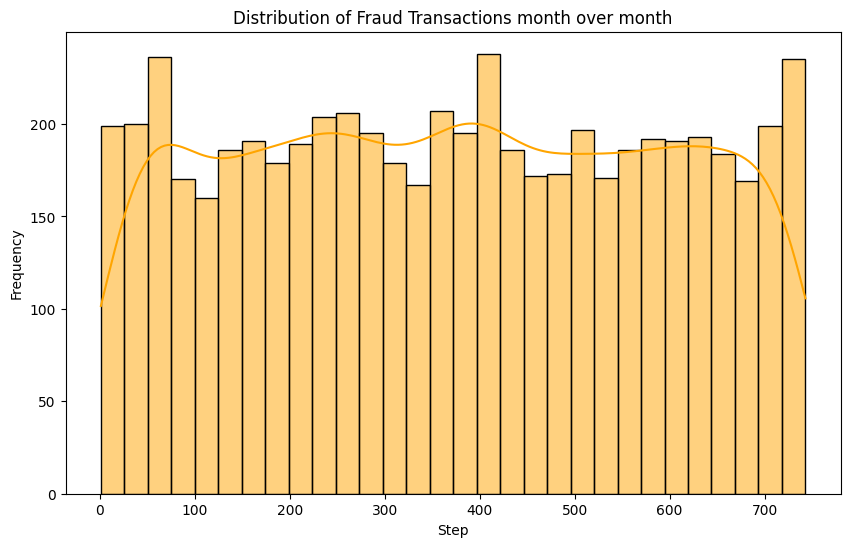

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud_transactions["step"], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Fraud Transactions month over month')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

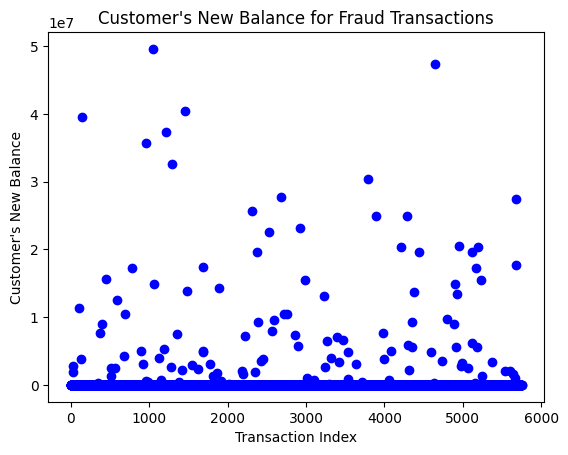

In [54]:
plt.scatter(range(len(fraud_transactions)), fraud_transactions['newbalanceOrig'], color='blue')
plt.title('Customer\'s New Balance for Fraud Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Customer\'s New Balance')
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder

numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

standard_scalar = StandardScaler()
X[numeric_columns] = standard_scalar.fit_transform(X[numeric_columns])

label_encoder = LabelEncoder()
X['type'] = label_encoder.fit_transform(X['type'])


In [56]:
X['isCustomerOrig'] = X['nameOrig'].str[0] == 'C'
X['isCustomerDest'] = X['nameDest'].str[0] == 'C'

X["isCustomerOrig"] = X["isCustomerOrig"].astype(int)
X["isCustomerDest"] = X["isCustomerDest"].astype(int)


X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest
4310249,0.45,0,0.13,C386091144,-0.28,-0.19,C268784004,1.04,0.86,1,1
318938,-1.60,4,2.01,C977405179,-0.14,-0.29,C1032483118,-0.32,-0.05,1,1
3375139,0.07,4,1.60,C1091684896,-0.27,-0.29,C1969901822,-0.32,-0.02,1,1
5492781,0.96,0,-0.02,C300199504,-0.26,-0.21,C591887141,0.11,0.02,1,1
807263,-1.43,0,-0.29,C905217988,1.78,1.76,C926869366,0.15,0.10,1,1


In [57]:
X[X["isCustomerDest"] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest
4707058,0.62,3,-0.28,C394061453,-0.25,-0.26,M924331074,-0.32,-0.33,1,0
2163231,-0.42,3,-0.28,C875453827,-0.29,-0.29,M1093589852,-0.32,-0.33,1,0
6265624,2.60,3,-0.30,C1423837410,-0.24,-0.25,M1844698831,-0.32,-0.33,1,0
5293434,0.91,3,-0.24,C202217517,-0.28,-0.29,M321600863,-0.32,-0.33,1,0
4856369,0.73,3,-0.26,C2081921416,-0.29,-0.29,M344604508,-0.32,-0.33,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3129586,-0.05,3,-0.29,C1021143141,-0.24,-0.24,M525200757,-0.32,-0.33,1,0
361127,-1.59,3,-0.28,C615177894,-0.28,-0.29,M1079815467,-0.32,-0.33,1,0
4182953,0.43,3,-0.28,C545341724,-0.29,-0.29,M253734860,-0.32,-0.33,1,0
3985280,0.38,3,-0.26,C1831600144,-0.29,-0.29,M1382629737,-0.32,-0.33,1,0


In [58]:
X[X["isCustomerOrig"] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isCustomerOrig,isCustomerDest


In [59]:
import statsmodels.api as sm


X_formula = X.loc[:, ['step', 'type', 'amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']]

glm_mod_1 = sm.Logit(y, X_formula).fit()
print(glm_mod_1.summary())

#we have a problem with quasi seperation because of type.


Optimization terminated successfully.
         Current function value: 0.043468
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              4453834
Model:                          Logit   Df Residuals:                  4453827
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                  -3.401
Time:                        06:48:52   Log-Likelihood:            -1.9360e+05
converged:                       True   LL-Null:                       -43990.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step               0.0481      0.004     11.794      0.000       0.040       0.056
type            

In [60]:
import statsmodels.api as sm


X_formula = X.loc[:, ['step', 'amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']]

glm_mod_1 = sm.Logit(y, X_formula).fit()
print(glm_mod_1.summary())

#Quasi-separation gone.



Optimization terminated successfully.
         Current function value: 0.692621
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              4453834
Model:                          Logit   Df Residuals:                  4453828
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                  -69.12
Time:                        06:49:26   Log-Likelihood:            -3.0848e+06
converged:                       True   LL-Null:                       -43990.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step               0.0036      0.001      3.756      0.000       0.002       0.005
amount           

Area under the ROC curve for training set : 0.955242
Optimal threshold is [0.5076460250737075]
Average error on training set is  1.0


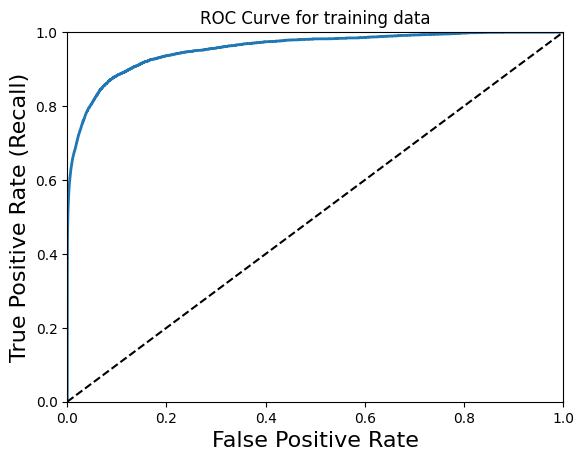

In [61]:
from sklearn.metrics import roc_curve, auc
import pylab as pl

pred_X = glm_mod_1.predict(X_formula)
fpr, tpr, threshold =roc_curve(y, pred_X)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve for training set : %f" % roc_auc)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.title("ROC Curve for training data")

#optimal threshold
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

threshold = list(roc_t['threshold'])
print('Optimal threshold is', threshold)
#rmse
print("Average error on training set is ", np.mean(y != pred_X))

In [62]:
#metrics for test data
from sklearn.metrics import confusion_matrix
X_test[numeric_columns] = standard_scalar.transform(X_test[numeric_columns])
X_test_formula = X_test.loc[:, ['step', 'amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']]
pred_X_test = glm_mod_1.predict(X_test_formula)
pred_X_test = [1 if prob > threshold[0] else 0 for prob in pred_X_test]

#rmse
print("Average error on test set is ", np.mean(y_test != pred_X_test))

confusion_matrix(y_test, pred_X_test)




Average error on test set is  0.11060223618572224


array([[1695512,  210810],
       [    306,    2158]])

In [63]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,pred_X_test)
print(" Precision score: ", precision )
recall = recall_score(y_test,pred_X_test)
print ("Recall score:", recall)

 Precision score:  0.010132977724352954
Recall score: 0.8758116883116883


In [64]:
#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_formula.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_formula.values, i)
                          for i in range(len(X_formula.columns))]

print(vif_data)

          feature    VIF
0            step   1.00
1          amount   3.68
2   oldbalanceOrg 428.22
3  newbalanceOrig 429.23
4  oldbalanceDest  64.20
5  newbalanceDest  73.94


In [65]:
D = X.loc[:, ['step', 'amount', 'oldbalanceOrg',	'newbalanceOrig', 'oldbalanceDest',	'newbalanceDest']]
D['isFraud'] = y
D.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00


Optimization terminated successfully.
         Current function value: 0.693125
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              4453834
Model:                          Logit   Df Residuals:                  4453830
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                  -69.18
Time:                        06:50:23   Log-Likelihood:            -3.0871e+06
converged:                       True   LL-Null:                       -43990.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step               0.0045      0.001      4.749      0.000       0.003       0.006
amount           

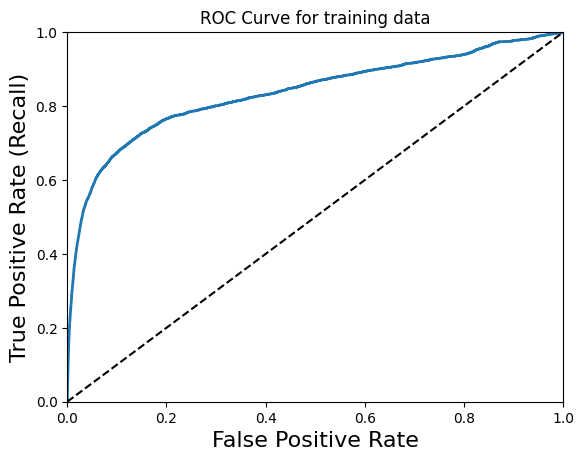

In [66]:
import statsmodels.api as sm


X_formula = X.loc[:, ['step', 'amount',	'newbalanceOrig', 'newbalanceDest']]

glm_mod_2 = sm.Logit(y, X_formula).fit()
print(glm_mod_2.summary())

from sklearn.metrics import roc_curve, auc
import pylab as pl

pred_X = glm_mod_2.predict(X_formula)
fpr, tpr, threshold =roc_curve(y, pred_X)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve for training set : %f" % roc_auc)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.title("ROC Curve for training data")

#optimal threshold
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

threshold = list(roc_t['threshold'])
print('Optimal threshold is', threshold)
#rmse
print("Average error on training set is ", np.mean(y != pred_X))

#metrics for test data

#X_test[numeric_columns] = standard_scalar.transform(X_test[numeric_columns])
X_test_formula = X_test.loc[:, ['step', 'amount', 'newbalanceOrig', 'newbalanceDest']]
pred_X_test = glm_mod_2.predict(X_test_formula)
pred_X_test = [1 if prob > threshold[0] else 0 for prob in pred_X_test]

#rmse
print("Average error on test set is ", np.mean(y_test != pred_X_test))

print(confusion_matrix(y_test, pred_X_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,pred_X_test)
print(" Precision score: ", precision )
recall = recall_score(y_test,pred_X_test)
print ("Recall score:", recall)

#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_formula.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_formula.values, i)
                          for i in range(len(X_formula.columns))]

print(vif_data)

In [67]:
#residual analysis
pred_X_values = [1 if prob > threshold[0] else 0 for prob in pred_X]
res = y - pred_X_values
res.head()

4310249    0
318938    -1
3375139   -1
5492781   -1
807263     0
Name: isFraud, dtype: int64

Optimization terminated successfully.
         Current function value: 0.693072
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              4453834
Model:                          Logit   Df Residuals:                  4453824
Method:                           MLE   Df Model:                            9
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                  -69.17
Time:                        06:51:18   Log-Likelihood:            -3.0868e+06
converged:                       True   LL-Null:                       -43990.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0047      0.001      4.995      0.000       0.003       0.007
x2             0.0284      0.

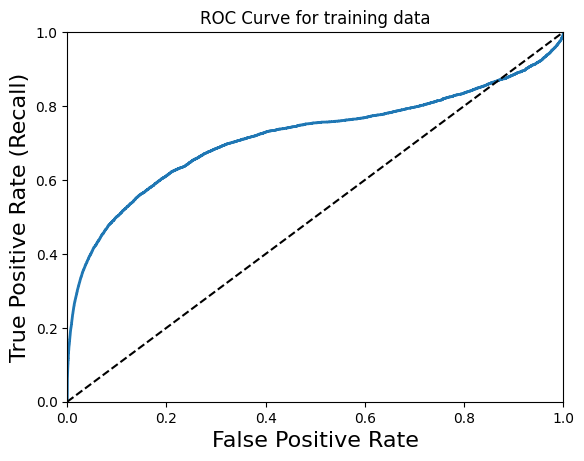

In [68]:
import statsmodels.api as sm
#Consider polynomial features
#step amount	oldbalanceOrg	newbalanceOrig	oldbalanceDest	newbalanceDest (6)
# step*amount step*oldbalanceorg step*newbalanceOrig step*oldbalanceDest newBalanceDest (5)
# amount*oldbalanceOrg amount*newbalanceOrig amount*oldbalanceDest amount*newbalanceDest (4)
# oldbalanceOrg*newbalanceOrig oldbalanceOrg*oldbalanceDest oldbalanceOrg*newbalanceDest (3)
# (2)
# (1)
# total=21.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)
X_formula = X.loc[:, ['step', 'amount', 'newbalanceOrig','newbalanceDest']]
poly = poly.fit(X_formula)
X_poly = poly.transform(X_formula)
StandardScaler = StandardScaler()
StandardScaler = StandardScaler.fit(X_poly)
X_poly = StandardScaler.transform(X_poly)

glm_mod_3 = sm.Logit(y, X_poly).fit()
print(glm_mod_3.summary())

from sklearn.metrics import roc_curve, auc
import pylab as pl

pred_X = glm_mod_3.predict(X_poly)
fpr, tpr, threshold =roc_curve(y, pred_X)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve for training set : %f" % roc_auc)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.title("ROC Curve for training data")

#optimal threshold
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

threshold = list(roc_t['threshold'])
print('Optimal threshold is', threshold)
#rmse
print("Average error on training set is ", np.mean(y != pred_X))

#metrics for test data

#X_test[numeric_columns] = standard_scalar.transform(X_test[numeric_columns])
X_test_formula = X_test.loc[:, ['step', 'amount', 'newbalanceOrig','newbalanceDest']]
X_poly_test = poly.transform(X_test_formula)
X_poly_test = StandardScaler.transform(X_poly_test)
pred_X_test = glm_mod_3.predict(X_poly_test)
pred_X_test = [1 if prob > threshold[0] else 0 for prob in pred_X_test]

#rmse
print("Average error on test set is ", np.mean(y_test != pred_X_test))

print(confusion_matrix(y_test, pred_X_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,pred_X_test)
print(" Precision score: ", precision )
recall = recall_score(y_test,pred_X_test)
print ("Recall score:", recall)